## Excess Frag Calc
The difference in two frags is a half normal distribution, and for three is the convolution of 2 2-frag distributions resulting in:
$$F(z;n) = 2A\sqrt{\frac{2}{\pi^3n}}\exp{(\frac{-z^2}{12n})}\mathrm{erf}(\frac{z}{2\sqrt{n}})$$

Here there is an adjustment to the normalization $A$ that is associated with the use of a Normal distribution in place of a binomial.
Analytically this comes out to about:
$$A \sim 0.9618$$

See https://math.stackexchange.com/questions/2637182/how-does-one-compute-the-convolution-of-two-half-normal-distributions

In [1]:
import numpy as np
import matplotlib.pyplot
from scipy.special import erf
from scipy.integrate import quad
plt.style.use("seaborn-dark-palette")

In [2]:
def rstate(k):
    a = np.random.poisson(k)
    b = np.random.poisson(k)
    c = np.random.poisson(k)
    base = min([a,b,c])
    base
    excess = a + b + c - 3*base
    return excess

def rstateTwo(k):
    a = np.random.poisson(k)
    b = np.random.poisson(k)
    base = min([a,b])
    base
    excess = a + b - 2*base
    return excess

Q = lambda z, n: 0.9618*2*(2/np.pi**3/n)**0.5*np.exp(-0.5*z**2/(6*n))*( erf(z/(4*n)**0.5) )
meanExcess = lambda k: quad(lambda x: x*Q(x,k),0,np.inf)[0]

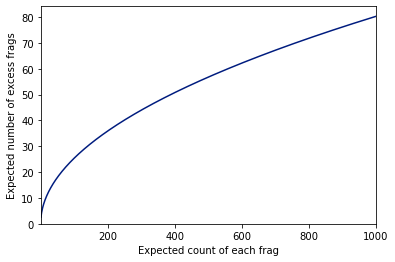

In [3]:
k = np.linspace(1, 1000, 1000)
plt.plot(k, np.array([meanExcess(a) for a in k]))
plt.xlabel("Expected count of each frag")
plt.ylabel("Expected number of excess frags")
plt.ylim(bottom=0)
plt.xlim(k.min(), k.max())
plt.show()

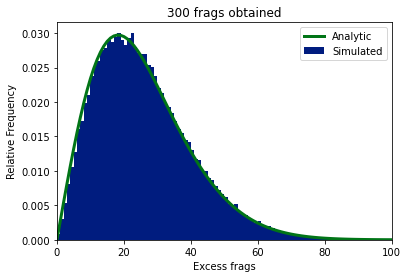

In [21]:
count = 100
p = [rstate(count) for a in range(100000)]
x = np.linspace(0, 100, 101)
plt.hist(p, bins=x, density=True, label="Simulated")

Q = lambda z, n: 0.9618*(2/np.pi**3/n)**0.5*np.exp(-0.5*z**2/(6*n))*( 2*erf(z/(4*n)**0.5) )
Z = Q(x, count)
plt.plot(x, Z, label="Analytic", linewidth=3)

plt.xlabel("Excess frags")
plt.ylabel("Relative Frequency")
plt.title("300 frags obtained")
plt.xlim(x.min(), x.max())
plt.legend()
plt.show()

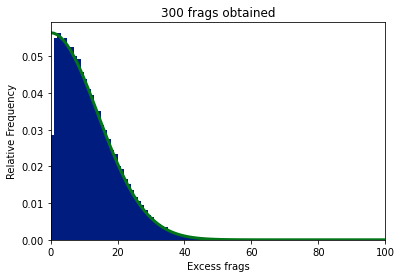

In [12]:
p = [rstateTwo(100) for a in range(100000)]
x = np.linspace(0, 100, 101)
f = lambda x, n: 2*(2*np.pi*2*n)**(-0.5)*np.exp(-(x)**2/4/n)
plt.hist(p, bins=x, density=True)
plt.plot(x, f(x,100), linewidth=3)
plt.xlabel("Excess frags")
plt.ylabel("Relative Frequency")
plt.title("300 frags obtained")
plt.xlim(x.min(), x.max())
plt.show()